### Heart Disease Prediction - Modeling

Import necessary libraries and data

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [148]:
#load training and test data
X_train = pd.read_csv('X_train.csv', index_col = False)
y_train = pd.read_csv('y_train.csv', index_col = False)
X_test = pd.read_csv('X_test.csv',  index_col = False)
y_test = pd.read_csv('y_test.csv', index_col = False)

X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

## Model 1: Logistic Regression

In [149]:
#choose liblinear solver due to relatively small dataset
classifier_LR = LogisticRegression(solver = 'liblinear', max_iter = 500)

In [150]:
# fit training data with classifer, use ravel() to ensure y input is flattened
classifier_LR.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=500, solver='liblinear')

In [151]:
y_predict_test_LR = classifier_LR.predict(X_test)
y_predict_training_LR = classifier_LR.predict(X_train)

In [152]:
print("[Test] Accuracy score LR: (y_predict_test, y_test):",
      f'{accuracy_score(y_predict_test_LR, y_test):.2f}')

[Test] Accuracy score LR: (y_predict_test, y_test): 0.84


In [153]:
print("[Training] Accuracy score LR: (y_train, y_predict_training)", 
      f'{accuracy_score(y_train, y_predict_training_LR):.2f}')

[Training] Accuracy score LR: (y_train, y_predict_training) 0.87


Print the confusion matrix





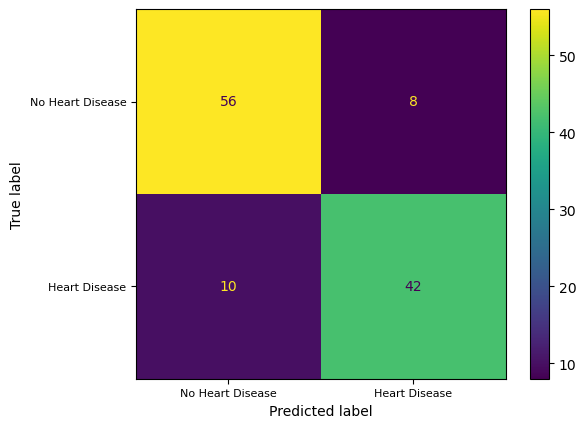

In [154]:
cm = confusion_matrix(y_test, y_predict_test_LR, labels = classifier_LR.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['No Heart Disease', 'Heart Disease'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
ax.set_yticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
display_cm.plot(ax = ax)

In [155]:
param_grid = {
    'C': [0.001, 0.1, 1, 10, 100],
}
gscv = GridSearchCV(classifier_LR, param_grid=param_grid, cv=5)

gscv.fit(X_train, y_train.values.ravel())

print('best score:',gscv.score(X_test, y_test))
print('best c:',gscv.best_estimator_)

best score: 0.853448275862069
best c: LogisticRegression(C=0.1, max_iter=500, solver='liblinear')


## Model 2: Support Vector Machines

In [156]:
classifier_SV = SVC(kernel = 'linear', C = 1, random_state = 123)

In [157]:
classifier_SV.fit(X_train, y_train.values.ravel())

SVC(C=1, kernel='linear', random_state=123)

In [158]:
y_predict_test_SV = classifier_SV.predict(X_test)
y_predict_training_SV = classifier_SV.predict(X_train)

In [159]:
print("[Test] Accuracy score SV: (y_predict_test, y_test):",
      f'{accuracy_score(y_predict_test_SV, y_test):.2f}')

[Test] Accuracy score SV: (y_predict_test, y_test): 0.83


In [160]:
print("[Training] Accuracy score SV: (y_train, y_predict_training)", 
      f'{accuracy_score(y_train, y_predict_training_SV):.2f}')

[Training] Accuracy score SV: (y_train, y_predict_training) 0.87


In [ ]:
# define grid of parameters
parameters = {
    'C': [1,2.5,5,7.5,10],
    'gamma':[0.00001, 0.0001,0.001,0.01,0.1,1,10]
}

# use grid search cv
search = GridSearchCV(classifier_SV, parameters)

# fitting the model
search.fit(X_train, y_train.values.ravel())

print("Optimal Parameters:", search.best_params_)
print("Best Score  :", search.best_score_)

# get predicted values
y_predict_GSCV_SV = search.predict(X_test)

print("[Test] Accuracy score Grid Search CV - SV: (y_predict_test, y_test):",
      f'{accuracy_score(y_predict_GSCV_SV, y_test):.2f}')

In [ ]:
cm = confusion_matrix(y_test, y_predict_test_SV, labels = classifier_LR.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['No Heart Disease', 'Heart Disease'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
ax.set_yticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
display_cm.plot(ax = ax)

## Model 3: Gradient Boosting

In [ ]:
classifier_GB = GradientBoostingClassifier(n_estimators = 50, max_depth = 1, subsample=0.95, max_features=0.25, random_state = 123)

# fit model
classifier_GB.fit(X_train, y_train.values.ravel())

In [ ]:
# predicting values
y_predict_test_GB = classifier_GB.predict(X_test)
y_predict_training_GB = classifier_GB.predict(X_train)

In [ ]:
print("[Test] Accuracy score SV: (y_predict_test, y_test):",
      f'{accuracy_score(y_predict_test_GB, y_test):.2f}')

In [ ]:
print("[Training] Accuracy score GB: (y_train, y_predict_training)", 
      f'{accuracy_score(y_train, y_predict_training_gb):.2f}')

In [ ]:
cm = confusion_matrix(y_test, y_predict_test_GB, labels = classifier_LR.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['No Heart Disease', 'Heart Disease'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
ax.set_yticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
display_cm.plot(ax = ax)

## Results


In reviewing these results, the gradient boosting model had the best accuracy of 86%. This was done by reducing the number of false negatives by 44% compared to the other models.That being said, the logistic regression is the best overall due to simplicity and more sound assumtions related to the dataset. Particularly, it seems to have the most similar accuracy when comparing the test and training datasets with 87% and 84%, respectively. This indicates that it is likely the most generalizable model of the three for these kind of data but it does not seem like this is the best possible result. I ran into an issue after doing an initial train test split of 80/20 with stratifed y, where all of the models were up to 12% more accurate on the test set than on the training set. This was likely due to the something in the test set making it easier for the models to predict. To counteract this, a larger portion of the data was dedicated to the test set. Despite this, the effect was still clear in the gradient boosting model. In future work, these models could be tweaked even further with different parameters and kernels. 